In [1]:
from google.cloud import bigquery
from google.cloud.bigquery import job
import pandas as pd
import os
from tqdm import tqdm
import pandas as pd
PROJCECT = 'ballosodeuk'
bq = bigquery.Client(project=PROJCECT)

c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [2]:
# 클라이언트 설정
client = bigquery.Client()

# SQL 파일 읽기
file = '챌린지보상확인.sql'
with open(file, 'r') as file:
    query = file.read()


In [3]:

# 쿼리 실행
job_config = bigquery.QueryJobConfig()
query_job = client.query(query, job_config=job_config)



In [4]:
df = query_job.to_dataframe()

In [7]:
df

,Airbridge_Device_Id,formatted_event_datetime,Event_Value,cycle_num
0,451d3a4f-234b-41d7-8303-c800061770ad,2024-04-14 15:00,60.0,1
1,b02cf483-132c-41fc-8286-f00e69feae06,2024-04-14 15:00,180.0,1
2,b37bbadf-03d0-4d5f-be4d-3329f36b0ca4,2024-04-14 15:00,60.0,1
3,822c9e5d-bdd0-4053-af36-93a8d7c6569f,2024-04-14 15:00,60.0,1
4,433f5046-722b-438c-a70b-04121961c96d,2024-04-14 15:00,40.0,1
...,...,...,...,...
524454,D2520E4F-2B0C-4C08-90C6-E6328AB9937D,2024-05-05 14:59,210.0,2
524455,4fa49bd2-f604-468b-b272-6b456d06658f,2024-05-05 14:59,180.0,2
524456,69D800BC-A976-45BC-8E34-E0688C428B14,2024-05-05 14:59,112.0,2
524457,d758c4a2-dca2-43cf-90c5-edd334be0bd2,2024-05-05 14:59,49.0,2


In [5]:
df_pivot = df.pivot_table(index=['Airbridge_Device_Id','formatted_event_datetime'],columns='cycle_num',values='Event_Value')
df_ = df_pivot.reset_index()
df_.columns

Index(['Airbridge_Device_Id', 'formatted_event_datetime', 1, 2, 3], dtype='object', name='cycle_num')

In [6]:
df_.columns = ['Airbridge_Device_Id', 'formatted_event_datetime','1','2','3']
df_['1'].mean(),df_['2'].mean(),df_['3'].mean()

(56.042033250749554, 78.45599174798218, 95.32987905138853)

In [42]:
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [8]:
df['date'] = pd.to_datetime(df['formatted_event_datetime']).dt.strftime("%Y-%m-%d")

In [32]:
df.columns

Index(['Airbridge_Device_Id', 'formatted_event_datetime', 'Event_Value',
       'cycle_num', 'date'],
      dtype='object')

c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

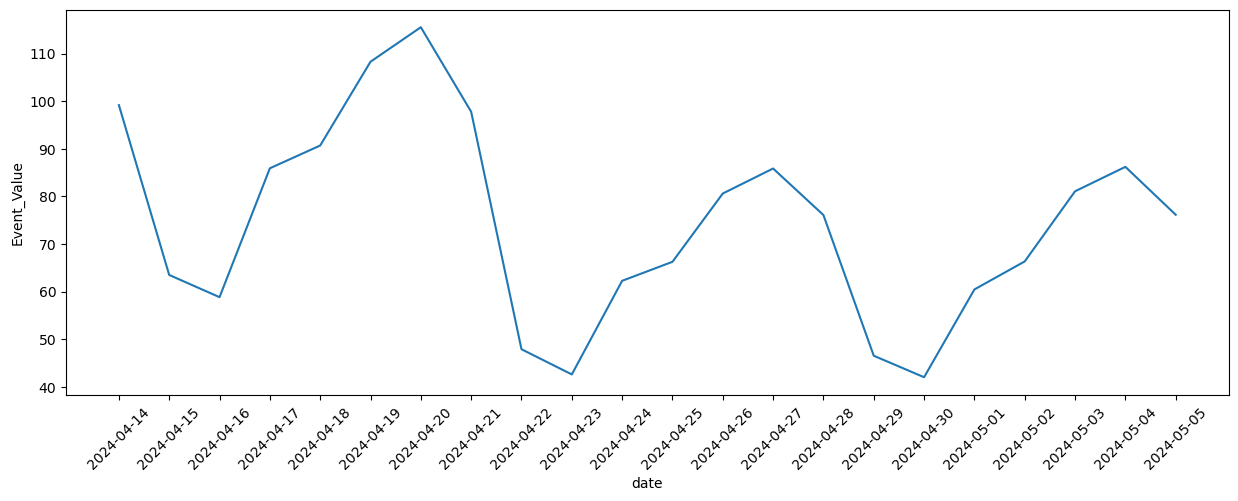

In [47]:
df__ = df.groupby('date').agg({'Event_Value':'mean'}).reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=df__,x='date',y='Event_Value')
plt.xticks(rotation=45)
plt.plot()

In [47]:
df_user_sp

,date,Airbridge_Device_Id,Event_Value
11071,2024-04-15,6e769e99-e117-4719-a993-9b69ad6daef1,30.0
14309,2024-04-15,97a19b88-a438-4842-bbb6-3229e99c8cc9,105.0
19661,2024-04-15,cf724ee7-982e-4aa7-96f9-63fde68bf0d8,15.0
22723,2024-04-16,018864f7-457f-4b29-b94b-4c90413b041d,90.0
28238,2024-04-16,387ca650-f7f7-4e93-8c61-5bf39c2ff7fb,35.0
...,...,...,...
434099,2024-05-04,226bf438-00f9-4b73-80ba-49dbb9c8bc0e,26.5
436506,2024-05-04,387ca650-f7f7-4e93-8c61-5bf39c2ff7fb,35.0
437792,2024-05-04,4469A231-6A32-4A3A-96B5-76ACF053477A,74.0
442436,2024-05-04,6e769e99-e117-4719-a993-9b69ad6daef1,84.0


[]

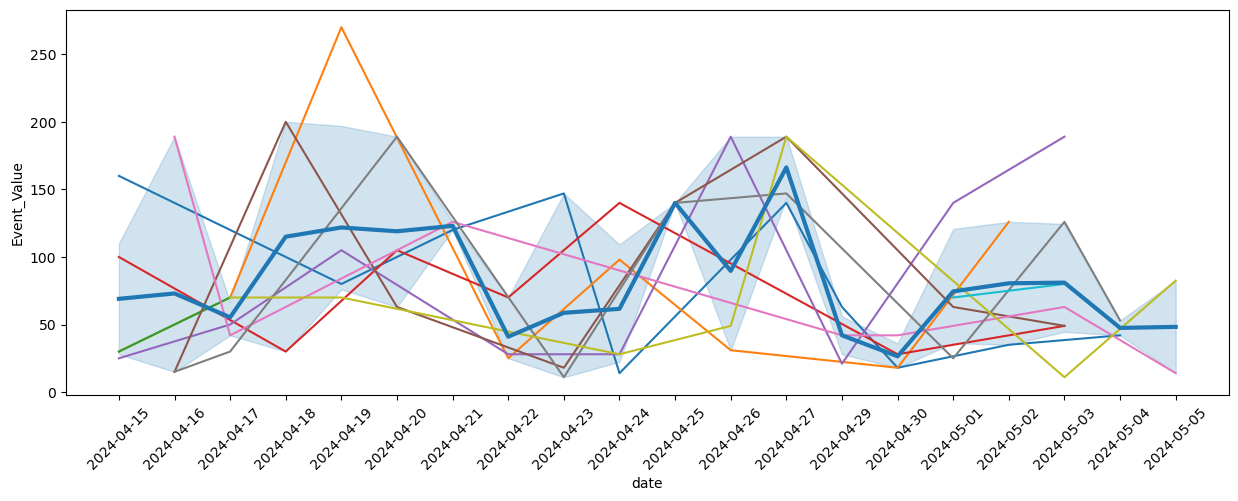

In [52]:
# df_user = df.groupby(['date','Airbridge_Device_Id']).agg({'Event_Value':'mean'}).reset_index()

# user = df_user.Airbridge_Device_Id.unique()




warnings.filterwarnings(action='ignore')
df_user_sp = df_user[df_user['Airbridge_Device_Id'].isin(user[list(np.random.choice(len(user),10))])] 
df_user
plt.figure(figsize=(15,5))
sns.lineplot(data=df_user_sp,x='date',y='Event_Value', hue='Airbridge_Device_Id',legend=False)
sns.lineplot(data=df_user_sp,x='date',y='Event_Value', linewidth=3,legend=False)
plt.xticks(rotation=45)
plt.plot()